In [22]:
import pandas as pd
#vamos importar os dados
url= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(url)
dados.head(5)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
# vamos renomear as colunas porque não gostamos de termos e inglês nos códigos
mapa={
    'unfinished': 'Nao_terminados',
    'expected_hours': 'Horas_esperadas',
    'price': 'Preco',
     }

dados = dados.rename(columns = mapa)
dados.head(5)

,Nao_terminados,Horas_esperadas,Preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
trocas = {
    0: 1,
    1: 0
         }

dados['finalizado']=dados.Nao_terminados.map(trocas)
dados.head(5)




,Nao_terminados,Horas_esperadas,Preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail(5)

,Nao_terminados,Horas_esperadas,Preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<Axes: xlabel='Horas_esperadas', ylabel='Preco'>

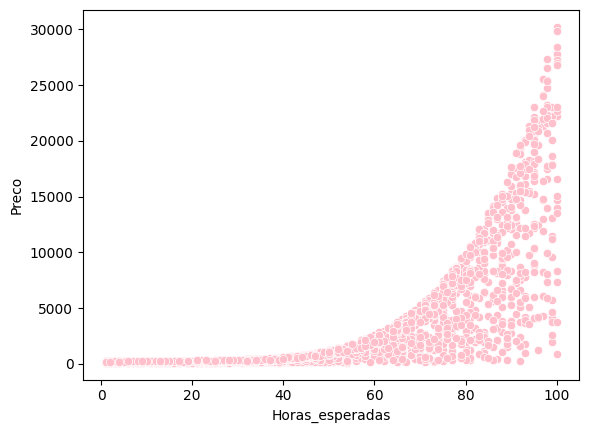

In [5]:
import seaborn as sns

sns.scatterplot(x='Horas_esperadas', y='Preco', data=dados, color='pink')

<Axes: xlabel='Horas_esperadas', ylabel='Preco'>

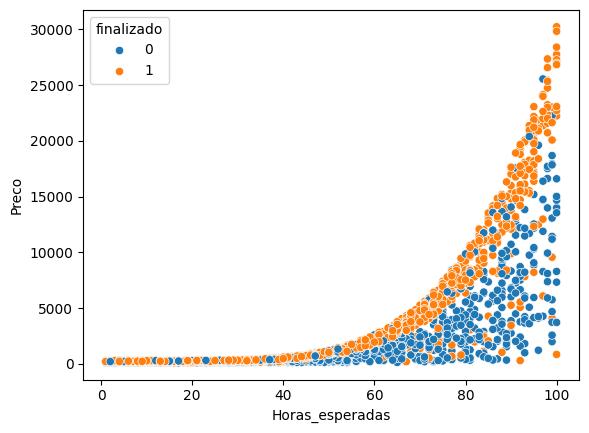

In [6]:
sns.scatterplot(x='Horas_esperadas', y='Preco', data=dados, hue='finalizado')

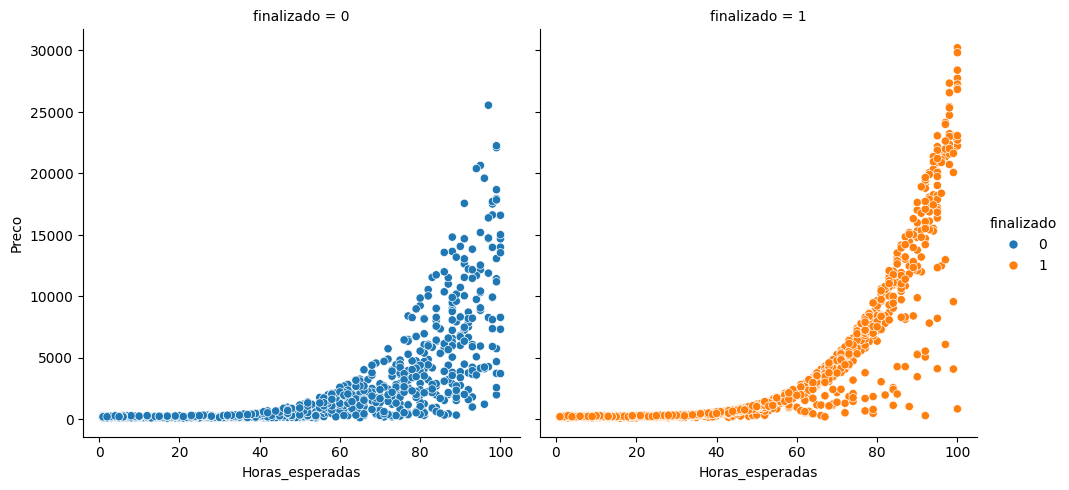

In [7]:
sns.relplot(x='Horas_esperadas', y='Preco', data=dados, hue = 'finalizado' , col='finalizado', color='red')

In [23]:
x = dados[['Horas_esperadas', 'Preco']]
y = dados['finalizado']

KeyError: "None of [Index(['Horas_esperadas', 'Preco'], dtype='object')] are in the [columns]"

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20 # tirar a aleatóro do treino e do teste.

treino_x,teste_x,treino_y,teste_y= train_test_split(x,y,random_state=SEED,test_size=0.25,
                                                    stratify = y)
# usamos o stratify para manter a proporcionalidade da treino e do teste do algoritmo.
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )


Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto foi de : 54.44%


In [10]:
import numpy as np
previsoes_do_gusta=np.ones(540) # criar uma matriz com varias linhas de base
previsoes_do_gusta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [11]:
taxa_de_acerto = accuracy_score(teste_y, previsoes_do_gusta)
taxa_de_acerto
print(f"Taxa de acerto do algoritmo de basesline foi de : {round((taxa_de_acerto * 100),2)}%"  )

Taxa de acerto do algoritmo de basesline foi de : 52.59%


<Axes: xlabel='Horas_esperadas', ylabel='Preco'>

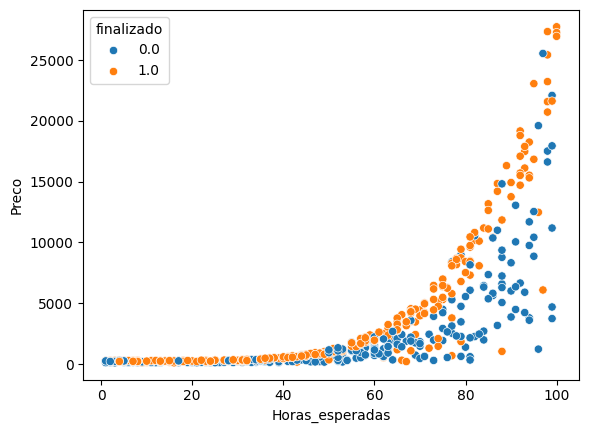

In [12]:
sns.scatterplot(x='Horas_esperadas', y='Preco', data=dados, hue=teste_y, color= {'yellow','red'})

In [13]:
x_min = teste_x.Horas_esperadas.min()
x_max  = teste_x.Horas_esperadas.max()
y_min = teste_x.Preco.min()
y_max  = teste_x.Preco.max()
print(x_min,x_max, y_min, y_max)

1 100 101 27738


In [14]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [15]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos= np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [16]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

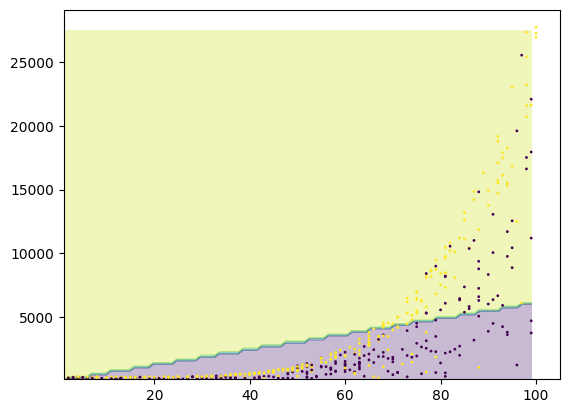

In [17]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(teste_x.Horas_esperadas,teste_x.Preco,c=teste_y,s=1)

# decision Boundary -> percebam que é uma reta

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5 # tirar a aleatóro do treino e do teste.
np.random.seed(SEED)
treino_x,teste_x,treino_y,teste_y= train_test_split(x,y,test_size=0.25,
                                                    stratify = y)
# usamos o stratify para manter a proporcionalidade da treino e do teste do algoritmo.
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )

Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto foi de : 55.19%


1 100 100 30223


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


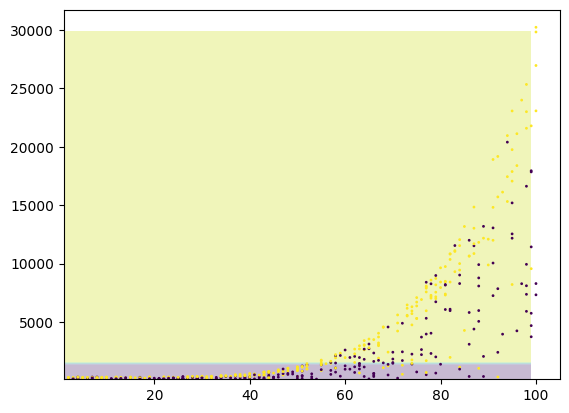

In [19]:
x_min = teste_x.Horas_esperadas.min()
x_max  = teste_x.Horas_esperadas.max()
y_min = teste_x.Preco.min()
y_max  = teste_x.Preco.max()
print(x_min,x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos= np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(teste_x.Horas_esperadas,teste_x.Preco,c=teste_y,s=1)

In [20]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5 # tirar a aleatóro do treino e do teste.
np.random.seed(SEED)
raw_treino_x,raw_teste_x,treino_y,teste_y= train_test_split(x,y,test_size=0.25,
                                                    stratify = y)
# usamos o stratify para manter a proporcionalidade da treino e do teste do algoritmo.
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
scaler.fit(teste_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes)
taxa_de_acerto
print(f"Taxa de acerto foi de : {round((taxa_de_acerto * 100),2)}%"  )


Treinaremos com 1617 elementos e testaremos com 540 elementos
Taxa de acerto foi de : 66.67%


-1.7251953962417 1.7004609527194587 -0.6067590564604418 5.129734421814402


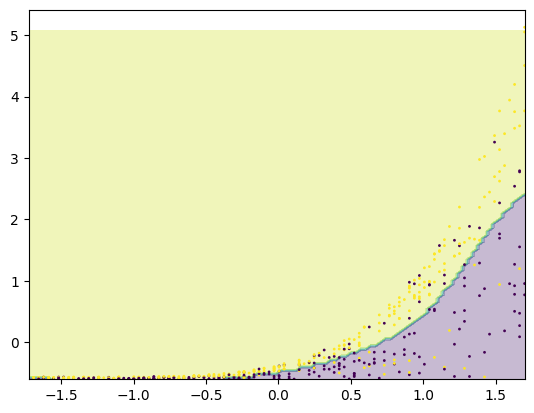

In [21]:

data_x= teste_x[:,0]
data_y= teste_x[:,1]

x_min = data_x.min()
x_max  = data_x.max()
y_min = data_y.min()
y_max  = data_y.max()
print(x_min,x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos= np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z,alpha=0.3)
plt.scatter(data_x,data_y,c=teste_y,s=1)